In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

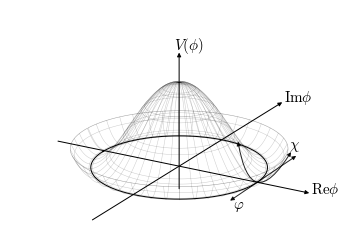

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X, Y, Z = axes3d.get_test_data(0.01)

eta = 1.5
lam = 0.8
r, theta = np.meshgrid(np.arange(-eta*1.22, eta*1.22, 0.03),
                      np.arange(-np.pi,np.pi, 0.03))
X = r*np.cos(theta)
Y = r*np.sin(theta)

Z = 0.5*(lam**2)*(X**2 + Y**2 - eta**2)**2

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))




# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10,color='Black',alpha=0.2,lw=0.5)

#Circle
r_c = np.ones(100)*eta
theta_c = np.arange(-np.pi,np.pi+0.1,(2*np.pi+0.1)/100.)
z_c = np.zeros(100)

x_c = r_c*np.cos(theta_c)
y_c = r_c*np.sin(theta_c)

ax.plot(x_c,y_c,z_c,color='Black')



#Axis arrows
top = 2.2
head_size = 8
a = Arrow3D([0,0], [0,0], 
                [-0.5,top], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(a)
b = Arrow3D([0,0], [-2.8,3.9], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(b)
c = Arrow3D([-2.5,2.5], [0,0], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="-|>", color="Black",zorder=100)
ax.add_artist(c)

#Chi/Psi arrows
d = Arrow3D([eta,eta], [-1,1.5], 
                [0,0], mutation_scale=head_size, 
                lw=1, arrowstyle="<|-|>", color="Black",zorder=100,alpha=0.85)
ax.add_artist(d)

e = Arrow3D([eta-0.39,eta+0.61], [0,0], 
                [0.75,0.75], mutation_scale=head_size,connectionstyle="arc3,rad=1.35",
                lw=1, arrowstyle="<|-|>", color="Black",zorder=100,alpha=0.85)
ax.add_artist(e)

#Axis labels
ax.text(-0.1, 0, top*1.0, r"$V(\phi)$", color='Black',size=15)
ax.text(0, 3.9, 0, r"$\mathrm{Im}\phi$", color='Black',size=15)
ax.text(2.5, 0, 0, r"$\mathrm{Re}\phi$", color='Black',size=15)

#Field Labels
ax.text(eta+0.52,0.05,0.75,r"$\chi$",color='Black',size=15)
ax.text(eta+0.2,-1.2,0.0,r"$\varphi$",color='Black',size=15)

#ax.axis('tight')
ax.axis('off')

#ax.set_aspect('equal')
ax.set_zlim([0,2])
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])

plt.savefig('ssb_potential.pdf', bbox_inches='tight', pad_inches=0)
plt.show()